In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [42]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model




In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/dataset/photos",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6400 files belonging to 4 classes.


In [8]:
class_names = dataset.class_names
class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [9]:
len(dataset)  #here 200 because every element in the dataset is a batch of 200 images

200

In [10]:

200*32  #you got 6400 when multiplied by 32 means every batch contain 32 images

6400

In [11]:
for image_batch, labels_batch in dataset.take(1):  #when you do this you get 1 batch and 1 batch contain 32 images 
    print(image_batch.shape)
    print(labels_batch.numpy())  #every element that you get is a tensor that need to be converted to numpy

(32, 256, 256, 3)
[3 2 3 3 0 2 3 2 0 0 3 3 3 3 3 2 0 0 3 3 2 2 2 2 0 2 0 3 3 2 0 3]


here (32,256,256,3) means batch containing 32 images of pixels 256*256 that have 3 s rgb value

[3 2 3 3 0 2 3 2 0 0 3 3 3 3 3 2 0 0 3 3 2 2 2 2 0 2 0 3 3 2 0 3] these represents the label batch and as each batch is
collection of 32 randm images therefore there are labels indicating labels 0,1,2,3

In [12]:
for image_batch, labels_batch in dataset.take(1): 
    print(image_batch[0].numpy()) #this will print the fisrt image of the batch

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


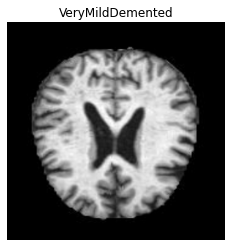

In [13]:
for image_batch, labels_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[labels_batch[0]]) #here we are assigning proper class name to the images with help of labels and 
                                            #class class names

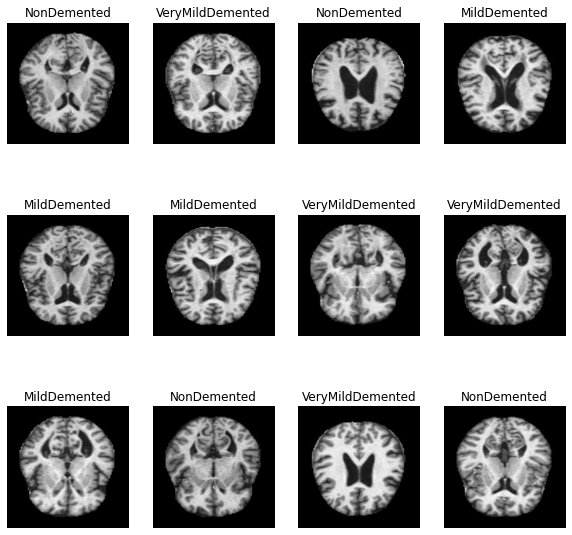

In [14]:


plt.figure(figsize=(10, 10))  #here I am making size of each image to 10 by 10 dimension 
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):    #each batch conatin 32 images and I am taking only 12 images 
        ax = plt.subplot(3, 4, i + 1)  #this makes a subplot which is 3 by 4 matrix, as you can see there are 4 images in 
                                       # 3 rows
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## ** Function to Split Dataset**

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

80% training
20% ===> 10% validation, 10% test

In [15]:
len(dataset) #as each batch contain 200 images

200

In [16]:
train_size = 0.8
len(dataset)*train_size  #as 80% os 200 is 160

160.0

In [17]:
train_ds = dataset.take(160)
len(train_ds)  #for training as 160 images were assigned therefore I am taking 160 images
                #dataset.take(160) this act as arr[:160]

160

In [18]:
test_ds = dataset.skip(160) #here we are taking 20% data for testing this include both validation an testing
len(test_ds)               #this dataset.skip(160) act as arr[160:]         

40

In [19]:





val_size=0.1        #validation is 10% therefore 20 images of dataset goes to validation 
len(dataset)*val_size 

20.0

In [20]:
val_ds = test_ds.take(20) #here we are taking 10% from test dataset that will act as validation
len(val_ds)

20

In [21]:
test_ds = test_ds.skip(20) #here we are taking data that is left after validation dataset that is 10% which comes to 20 images
len(test_ds)

20

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:         #here we are shuffling data
        ds = ds.shuffle(shuffle_size, seed=12) #here seed is just a number that elps in shuffling
    
    train_size = int(train_split * ds_size)  # as said earlier for training we are taking 80% of the data 
    val_size = int(val_split * ds_size)      # as said earlier for training we are taking 10% of the data 
    
    train_ds = ds.take(train_size)          #for training we are taking 80% of data 
    val_ds = ds.skip(train_size).take(val_size)  # for validation we are skipping the training data and taking it in validation
    test_ds = ds.skip(train_size).skip(val_size)  # for taining we are skipping the training data and also the validation data 
                                                  # and what we get as outcome is test data that is 10%
    return train_ds, val_ds, test_ds    

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset) #here we are calling get_dataset_partitions_tf() on my data
                                                               # which has variable name dataset 
                                                               # we are doing train,test,split on my dataset

len of train_ds val_ds and test_ds is coming what we expected them to be

In [24]:
len(train_ds)

160

In [25]:


len(val_ds)

20

In [26]:
len(test_ds)

20

#  Cache, Shuffle, and Prefetch the Dataset

here cache will save our time as by usin cache as if we dont have cache during second epoch images will be read again and so on
 but if we use cache we will save time by not reading those images again and again during multiple epoch

prefetch is just like pipeling means when GPU is working on batch 1 let say it is training batch 1 then simultaneoulsy CPU
 will load batch 2 

 here we are using buffer_size=tf.data.AUTOTUNE that lets tensorfow decide how many batches to load while GPU is training

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the Model

### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. 
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

resacling as you know each array contain values that ranges from 0-255 we are rescaling them to 0-1

In [28]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [29]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

HERE WE ARE USING input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) SO THET IT CAN BE USED IN layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape), AS THIS IS THE BASIC INPUT OF 

In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), #softmax will normalise the probability of your classes
])

model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

Total params: 183,812
Trainable params: 183,812
Non-trainable params: 0

These are basically the weights that you need to train doing backpropagation


### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

We are doing verbose=1 so that it prints a lot of output and we can see what is going on
We have validation data that will be used in every epoch  that lets you tarck the accuracy

I will store this in history parameter so that we can record every epoch that will be used to plots charts 

In [33]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=130,
)

Epoch 1/130
160/160 [==============================] - 642s 111ms/step - loss: 1.0605 - accuracy: 0.4898 - val_loss: 1.0434 - val_accuracy: 0.4953
Epoch 2/130
160/160 [==============================] - 11s 71ms/step - loss: 1.0315 - accuracy: 0.5023 - val_loss: 0.9539 - val_accuracy: 0.5531
Epoch 3/130
160/160 [==============================] - 11s 70ms/step - loss: 0.9575 - accuracy: 0.5361 - val_loss: 0.9427 - val_accuracy: 0.5437
Epoch 4/130
160/160 [==============================] - 11s 70ms/step - loss: 0.9384 - accuracy: 0.5498 - val_loss: 0.9778 - val_accuracy: 0.5453
Epoch 5/130
160/160 [==============================] - 11s 70ms/step - loss: 0.9279 - accuracy: 0.5490 - val_loss: 0.9298 - val_accuracy: 0.5641
Epoch 6/130
160/160 [==============================] - 11s 70ms/step - loss: 0.9245 - accuracy: 0.5578 - val_loss: 0.9476 - val_accuracy: 0.5531
Epoch 7/130
160/160 [==============================] - 11s 70ms/step - loss: 0.9197 - accuracy: 0.5551 - val_loss: 0.9292 - val_

In [34]:
model.save('alzheimer_attempt_201')

INFO:tensorflow:Assets written to: alzheimer_attempt_2/assets


In [1]:
from keras.models import load_model

In [44]:
new_model=load_model('alzheimer_attempt_2')

### Plotting the Accuracy and Loss Curves

In [45]:
history #this is keras callback history

In [46]:
history.params #these are history parameters

{'epochs': 130, 'steps': 160, 'verbose': 1}

 #history object has another element history and (['loss', 'accuracy', 'val_loss', 'val_accuracy'])
 #these parameters are the parameters that we got while running the epochs and each of these parameters contain 10 values as we have run it for 10 epochs

In [47]:
history.history.keys() #history object has another element history and (['loss', 'accuracy', 'val_loss', 'val_accuracy'])
                       #these parameters are the parameters that we got while running the epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
(history.history['accuracy']) #it is a python list that contain 4 values of loss as at last we ran it for only 4 epoch

[0.4898437559604645,
 0.5023437738418579,
 0.5361328125,
 0.5498046875,
 0.549023449420929,
 0.557812511920929,
 0.5550781488418579,
 0.5601562261581421,
 0.5619140863418579,
 0.563671886920929,
 0.5654296875,
 0.566210925579071,
 0.564257800579071,
 0.572265625,
 0.5751953125,
 0.572460949420929,
 0.5609375238418579,
 0.5816406011581421,
 0.575390636920929,
 0.582226574420929,
 0.581250011920929,
 0.5767577886581421,
 0.588085949420929,
 0.584179699420929,
 0.585742175579071,
 0.5894531011581421,
 0.6000000238418579,
 0.594921886920929,
 0.5990234613418579,
 0.5931640863418579,
 0.5982421636581421,
 0.603710949420929,
 0.6048828363418579,
 0.6087890863418579,
 0.596875011920929,
 0.610546886920929,
 0.610546886920929,
 0.621289074420929,
 0.621289074420929,
 0.6177734136581421,
 0.628125011920929,
 0.62109375,
 0.633593738079071,
 0.630664050579071,
 0.6279296875,
 0.6351562738418579,
 0.6382812261581421,
 0.634570300579071,
 0.6480468511581421,
 0.6314452886581421,
 0.641796886920929

In [49]:
type(history.history['accuracy'])

list

In [50]:
len(history.history['accuracy'])

130

In [51]:
history.history['accuracy'][:5] # show loss for first 4 epochs(as at last we did only 4 epoch)

[0.4898437559604645,
 0.5023437738418579,
 0.5361328125,
 0.5498046875,
 0.549023449420929]

with the help of this we will be able to plot training and validation accuracy

In [52]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

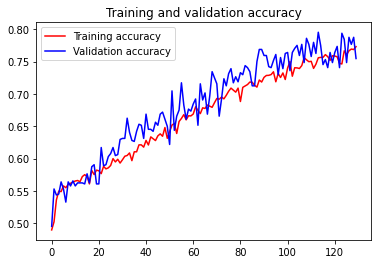

<Figure size 432x288 with 0 Axes>

In [53]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

The vertical line represents the number of epochs and the vertical line represents the accuracy

You can see as the number of epochs are increasing the accuracy is also increasing

The vertical line represents the number of epochs and the vertical line represents the loss
You can see as the number of epochs are increasing the loss(error) is decreasing
At the start the loss was 105% now after 10 epoch the loss has reduced to 900%

In [54]:
for images_batch, labels_batch in test_ds.take(1): #here we are taking only one batch and this images_batch has 32 images 
     print(images_batch[0].numpy()) #here I have printed the first image of batch 1 by using print(images_batch[0].

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


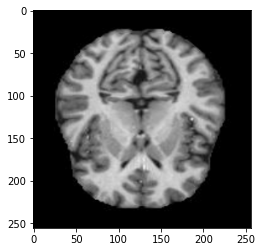

In [55]:

for images_batch, labels_batch in test_ds.take(1):
    
    plt.imshow(images_batch[0].numpy().astype('uint8')) #if you do plt.imshow and use uint8 it will show you the actual image

first image to predict
actual label of first image : 3


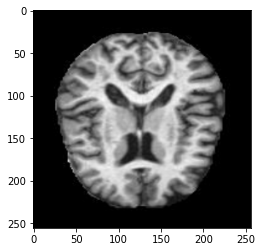

In [56]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8') #first image gets stored in first_image 
    first_label = labels_batch[0].numpy()                 #first labels_batch gets stored in first_label
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label of first image :",first_label) #this will print the actual label of the first image 

first image to predict
actual label: VeryMildDemented
[4.9294595e-06 4.9745873e-27 8.3169015e-03 9.9167812e-01]


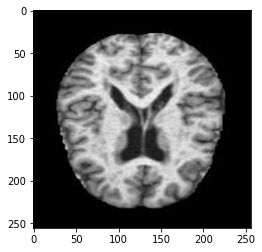

In [57]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label]) # if you want the class name of the first label just add class name to it
    
    batch_prediction = model.predict(images_batch)  #as we have already created model therefore we can use the model.predict
                                                    #and to model.predict we have passed images_batch as it contain the 32 images
                                                    #and the result we have stored in batch_prediction 
    print(batch_prediction[0])         #this will print the probablity of the result of  test data 
                                       #this will print probablity as we have used softmax and 4 classes and the value with 
                                       # highest number will be our predicted label of firstimage 

In [58]:
import numpy as np
np.argmax([0.0288019,  0.00188396, 0.71332836, 0.25598583]) #this argmax will return the index with the highest value 

2

In [59]:
import numpy as np
print(class_names[np.argmax([4.2527739e-04, 5.4358690e-08, 7.4386990e-01, 2.5570482e-01])])

NonDemented


first image to predict
actual label: NonDemented
predicted label: VeryMildDemented


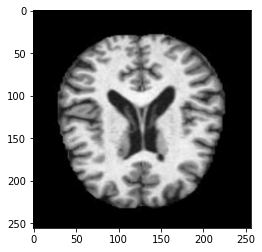

In [60]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label]) # if you want the class name of the first label just add class name to it
    
    batch_prediction = model.predict(images_batch)  #as we have already created model therefore we can use the model.predict
                                                    #and to model.predict we have passed images_batch as it contain the 32 images
                                                    #and the result we have stored in batch_prediction 
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])         #this will print the probablity of the result of  test data 
                                       #this will print probablity as we have used softmax and 4 classes and the value with 
                                 

In [61]:
def predict(model, img): #here I am taking model and img as input and returning predicted_class and confidence 
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #we converted image into imgae array
    img_array = tf.expand_dims(img_array, 0) #created a batch 

    predictions = model.predict(img_array) #prediction

    predicted_class = class_names[np.argmax(predictions[0])] #predicated class name 
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

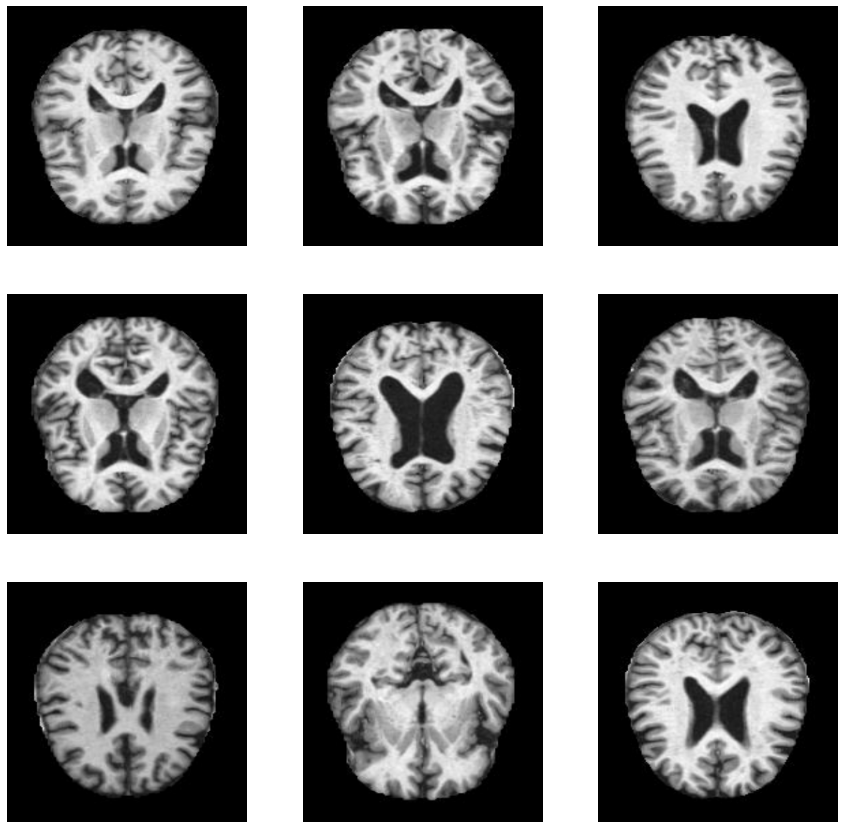

In [62]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
      
        
        plt.axis("off")

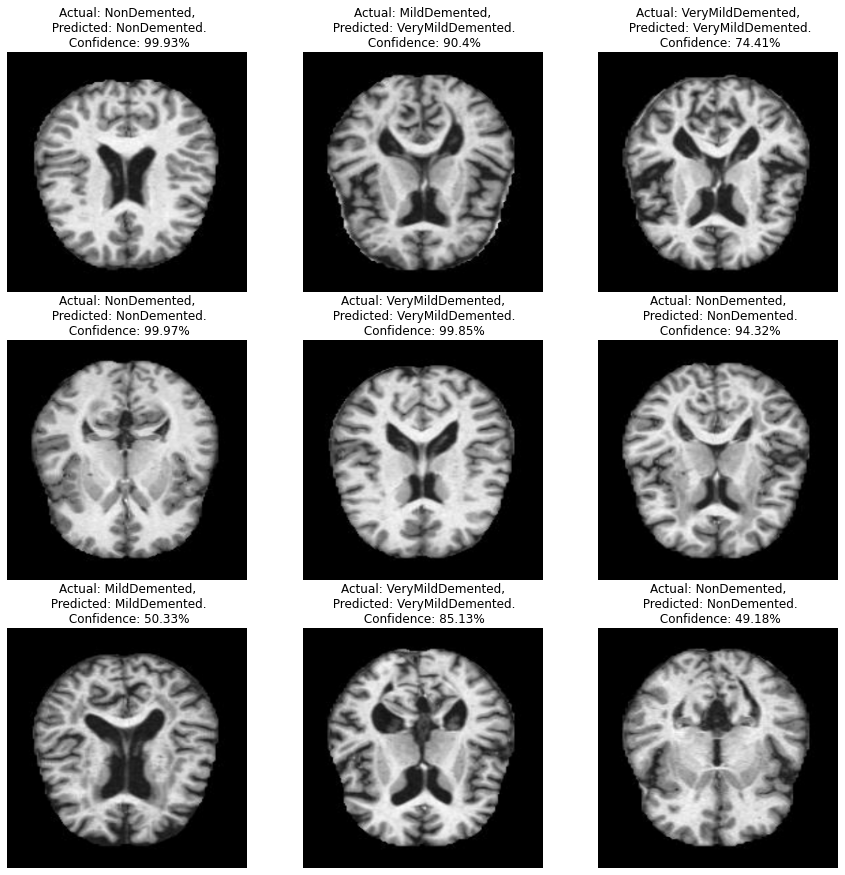

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy()) # I am calling the predicted func on the model we have 
        actual_class = class_names[labels[i]]                           #on images that is stored as numpy
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [71]:
for images, labels in test_ds.take(200):
    for i in range(32):
   
        
        
       
        actual_class = class_names[labels[i]] 
        print(actual_class)
        

VeryMildDemented
NonDemented
VeryMildDemented
NonDemented
VeryMildDemented
VeryMildDemented
VeryMildDemented
NonDemented
VeryMildDemented
MildDemented
VeryMildDemented
NonDemented
NonDemented
NonDemented
NonDemented
VeryMildDemented
MildDemented
MildDemented
VeryMildDemented
NonDemented
NonDemented
MildDemented
NonDemented
MildDemented
VeryMildDemented
NonDemented
MildDemented
MildDemented
NonDemented
VeryMildDemented
VeryMildDemented
NonDemented
MildDemented
MildDemented
NonDemented
VeryMildDemented
NonDemented
VeryMildDemented
NonDemented
NonDemented
NonDemented
VeryMildDemented
NonDemented
NonDemented
NonDemented
NonDemented
ModerateDemented
VeryMildDemented
MildDemented
NonDemented
VeryMildDemented
MildDemented
VeryMildDemented
NonDemented
NonDemented
VeryMildDemented
NonDemented
MildDemented
NonDemented
NonDemented
VeryMildDemented
VeryMildDemented
VeryMildDemented
MildDemented
VeryMildDemented
NonDemented
NonDemented
ModerateDemented
NonDemented
VeryMildDemented
VeryMildDemented


In [87]:
actual=[]
for images, labels in test_ds.take(1):
    for i in range(32):
        
        
       
        actual_class=labels[i].numpy()
        actual.append(actual_class) 
        
print(actual)

[2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 3]


In [88]:


for images, labels in test_ds.take(1):
    for i in range(32):
        
                
        predicted_class, confidence = predict(model, images[i].numpy()) # I am calling the predicted func on the model we have 
        actual_class = class_names[labels[i]]                           #on images that is stored as numpy
       
        
        print(predicted_class)
        
    

NonDemented
VeryMildDemented
NonDemented
VeryMildDemented
NonDemented
NonDemented
VeryMildDemented
NonDemented
NonDemented
NonDemented
VeryMildDemented
NonDemented
MildDemented
NonDemented
VeryMildDemented
NonDemented
MildDemented
MildDemented
NonDemented
NonDemented
MildDemented
NonDemented
VeryMildDemented
VeryMildDemented
VeryMildDemented
NonDemented
NonDemented
VeryMildDemented
NonDemented
NonDemented
NonDemented
VeryMildDemented


In [94]:

for images, labels in test_ds.take(200):
    new=[]
    for i in range(32):
      
        
        predicted = predict(model, images[i].numpy()) # I am calling the predicted func on the model we have #on images that is stored as numpy
        predicted=list(predicted) 
        predicted =np.array(predicted)
                                
         
          
        if predicted[i]=='NonDemented':
            predicted[i]=2
        elif predicted[i]=='VeryMildDemented':
            predicted[i]=3
        elif predicted[i]=='MildDemented':
            predicted[i]=0
        else:
            if predicted[i]=='ModerateDemented':
                predicted[i]=1
        
        new.append(predicted[i])
        
        
print(new)
print(len(new))


IndexError: ignored

In [79]:
class_labels=["mild","moderate","no","verymild"]

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams

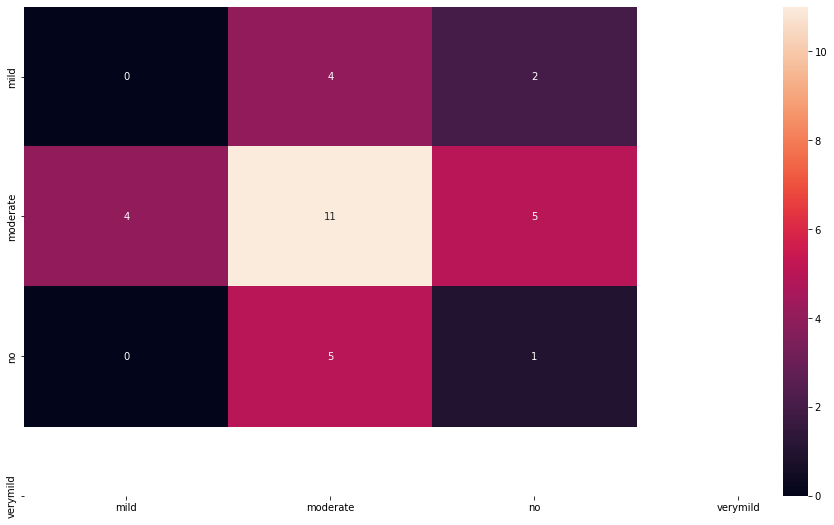

In [90]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
cm=confusion_matrix(actual,new)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [91]:
class_labels1=["mild","moderate","no","verymild"]

In [92]:
from sklearn.metrics import classification_report
cr=classification_report(actual,new,target_names=class_labels1)
print (cr)

ValueError: ignored